In [2]:
import spacy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Companies.csv to Companies.csv


In [5]:
df = pd.read_csv('Companies.csv')
df.head()

,ID,Name,Sentiment,Tweet
0,1,Amazon,Negative,@amazon wtf .
1,1,Amazon,Negative,@ amazon wtf.
2,1,Amazon,Negative,@ amazon wtf.
3,1,Amazon,Negative,@amazon wtf?
4,1,Amazon,Negative,7 @amazon wtf.


In [6]:
df.shape

(18702, 4)

In [7]:
df.columns

Index(['ID', 'Name', 'Sentiment', 'Tweet'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18702 entries, 0 to 18701
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         18702 non-null  int64 
 1   Name       18702 non-null  object
 2   Sentiment  18702 non-null  object
 3   Tweet      18525 non-null  object
dtypes: int64(1), object(3)
memory usage: 584.6+ KB


In [9]:
df.isna().sum()

,0
ID,0
Name,0
Sentiment,0
Tweet,177


In [10]:
df.duplicated().sum()

np.int64(590)

In [11]:
df

,ID,Name,Sentiment,Tweet
0,1,Amazon,Negative,@amazon wtf .
1,1,Amazon,Negative,@ amazon wtf.
2,1,Amazon,Negative,@ amazon wtf.
3,1,Amazon,Negative,@amazon wtf?
4,1,Amazon,Negative,7 @amazon wtf.
...,...,...,...,...
18697,9200,Nvidia,Positive,Just realized that the Windows partition of my...
18698,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
18699,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
18700,9200,Nvidia,Positive,Just realized between the windows partition of...


In [12]:
df['Sentiment'].value_counts()

,count
Sentiment,
Neutral,6480
Negative,6030
Positive,3846
Irrelevant,2346


<ipython-input-13-9dcd0823f740>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = 'Sentiment', palette = 'Set2')


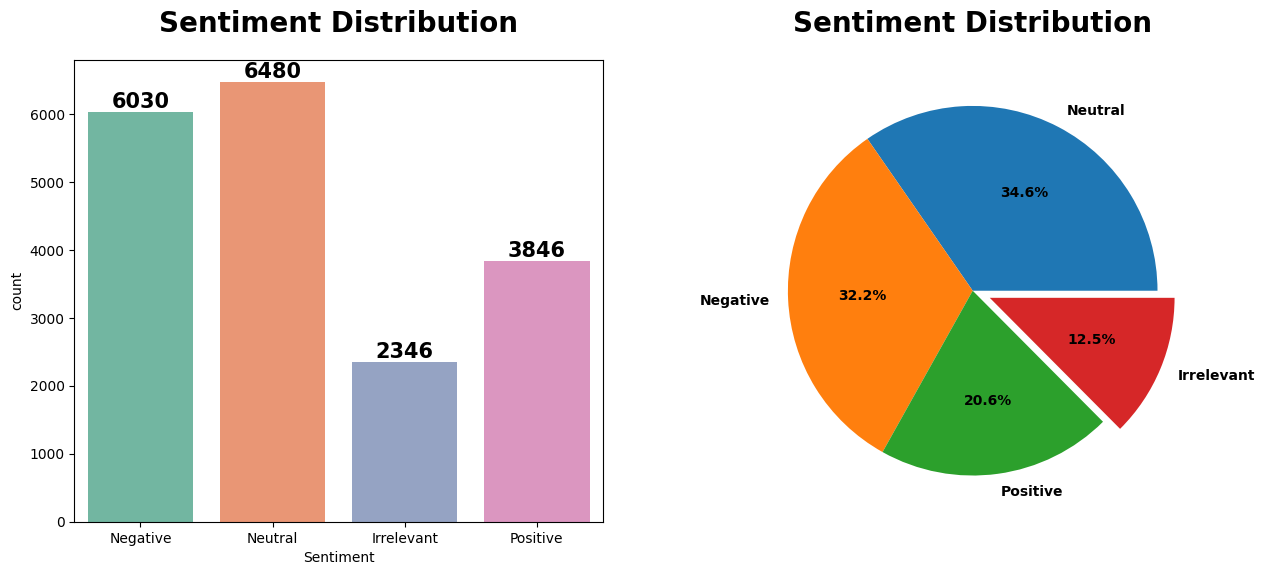

In [13]:
plt.figure(figsize = (15, 6))
plt.subplot(1,2,1)
ax = sns.countplot(data = df, x = 'Sentiment', palette = 'Set2')
for container in ax.containers:
    ax.bar_label(container, fontweight = 'black', size = 15)
plt.title("Sentiment Distribution", fontweight = 'black', size = 20, pad = 20)


plt.subplot(1,2,2)
plt.pie(df['Sentiment'].value_counts(), autopct = '%1.1f%%', labels = df['Sentiment'].value_counts().index, explode = [0,0,0,0.1],colors=sns.set_palette("Set2"), textprops={"fontweight":"black"})
plt.title("Sentiment Distribution", fontweight = 'black', size = 20, pad = 20)

plt.show()

In [14]:
df['Name'].value_counts()

,count
Name,
Microsoft,2400
Verizon,2382
Facebook,2370
johnson&johnson,2328
Amazon,2316
HomeDepot,2310
Google,2298
Nvidia,2298


<ipython-input-15-efbb74a777c6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['Name'].value_counts().values, y = df['Name'].value_counts().index, palette = 'viridis')


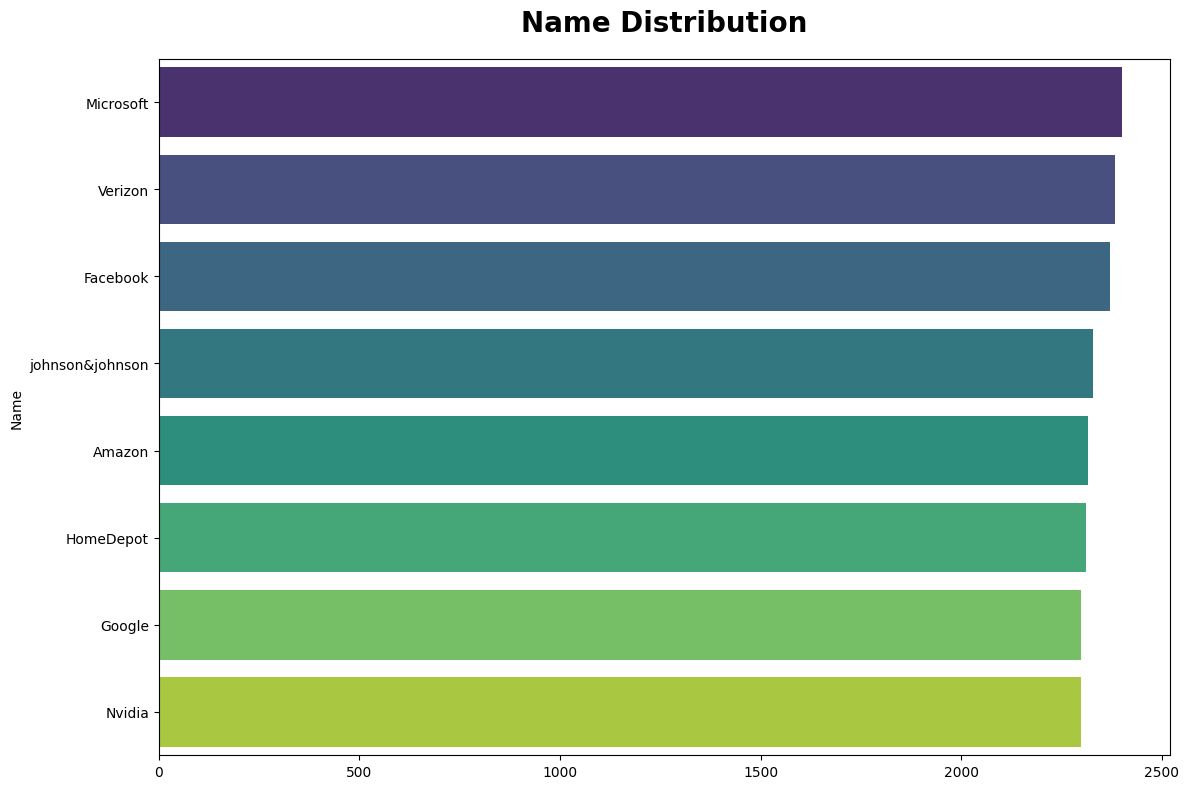

In [15]:
plt.figure(figsize = (12, 8))
sns.barplot(x = df['Name'].value_counts().values, y = df['Name'].value_counts().index, palette = 'viridis')
plt.title("Name Distribution", fontweight = 'black', size = 20, pad = 20)

plt.tight_layout()
plt.show()

In [16]:
df.dropna(inplace = True)

In [17]:
df.isna().sum()

,0
ID,0
Name,0
Sentiment,0
Tweet,0


In [18]:
nlp = spacy.load('en_core_web_sm')

In [19]:
def preprocessing(text):
    doc = nlp(text)
    cleaned_tokens = []

    for token in doc:
        if token.is_stop or token.is_punct:
            continue

        else:
            cleaned_tokens.append(token.lemma_)

    return " ".join(cleaned_tokens)

In [20]:
df['cleaned_text'] = df['Tweet'].apply(preprocessing)

In [21]:
df.head()

,ID,Name,Sentiment,Tweet,cleaned_text
0,1,Amazon,Negative,@amazon wtf .,@amazon wtf
1,1,Amazon,Negative,@ amazon wtf.,amazon wtf
2,1,Amazon,Negative,@ amazon wtf.,amazon wtf
3,1,Amazon,Negative,@amazon wtf?,@amazon wtf
4,1,Amazon,Negative,7 @amazon wtf.,7 @amazon wtf


In [22]:
df['Combined_Text'] = df['cleaned_text'] + ' ' + df['Name']

In [23]:
encoder = LabelEncoder()

df['label'] = encoder.fit_transform(df['Sentiment'])

In [24]:
df.head()

,ID,Name,Sentiment,Tweet,cleaned_text,Combined_Text,label
0,1,Amazon,Negative,@amazon wtf .,@amazon wtf,@amazon wtf Amazon,1
1,1,Amazon,Negative,@ amazon wtf.,amazon wtf,amazon wtf Amazon,1
2,1,Amazon,Negative,@ amazon wtf.,amazon wtf,amazon wtf Amazon,1
3,1,Amazon,Negative,@amazon wtf?,@amazon wtf,@amazon wtf Amazon,1
4,1,Amazon,Negative,7 @amazon wtf.,7 @amazon wtf,7 @amazon wtf Amazon,1


In [25]:
X = df['Combined_Text']
y = df['label']

In [26]:

tfidf = TfidfVectorizer()

X_vectorized = tfidf.fit_transform(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size = 0.2, random_state = 42)

In [28]:
X_train.shape

(14820, 13231)

In [29]:
y_train.shape

(14820,)

In [30]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
lr.score(X_train, y_train)

0.9263832658569501

In [32]:
y_pred = lr.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8601889338731444

<Axes: >

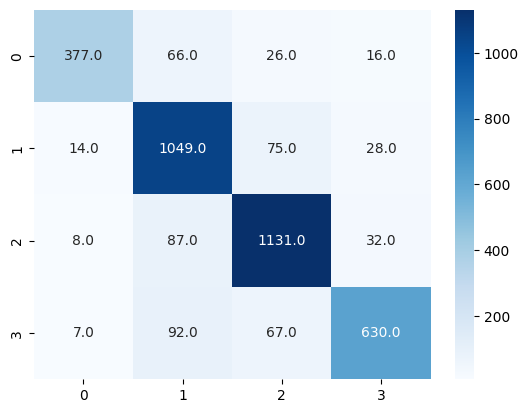

In [34]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True,fmt ='0.1f', cmap = 'Blues')

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85       485
           1       0.81      0.90      0.85      1166
           2       0.87      0.90      0.88      1258
           3       0.89      0.79      0.84       796

    accuracy                           0.86      3705
   macro avg       0.88      0.84      0.86      3705
weighted avg       0.86      0.86      0.86      3705



In [36]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
rf.score(X_train, y_train)

0.9838056680161943

In [38]:
y_pred = rf.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.951417004048583

<Axes: >

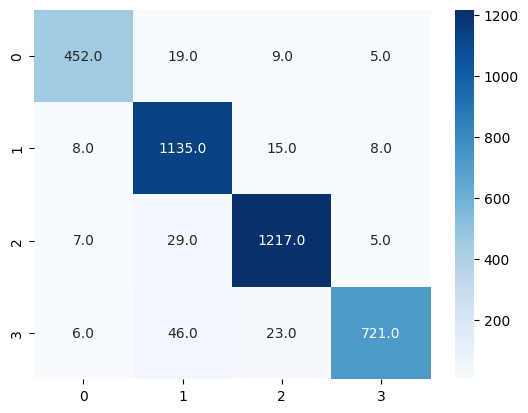

In [40]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True,fmt ='0.1f', cmap = 'Blues')

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       485
           1       0.92      0.97      0.95      1166
           2       0.96      0.97      0.97      1258
           3       0.98      0.91      0.94       796

    accuracy                           0.95      3705
   macro avg       0.95      0.94      0.95      3705
weighted avg       0.95      0.95      0.95      3705



svm

In [42]:
le_model = LabelEncoder()
df['Sentiment'] = le_model.fit_transform(df['Sentiment'])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Sentiment'],
                                                    test_size=0.2, random_state=42, stratify=df['Sentiment'])

In [44]:
from sklearn.svm import SVC
clf = Pipeline([
    ('vectorizer_tri_grams', TfidfVectorizer()),
    ('svm', SVC(kernel='linear'))
])

In [45]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_tri_grams', TfidfVectorizer()),
                ('svm', SVC(kernel='linear'))])

In [46]:
y_pred = clf.predict(X_test)

In [47]:
print(accuracy_score(y_test, y_pred))

0.9300944669365722


In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       464
           1       0.89      0.94      0.92      1198
           2       0.96      0.94      0.95      1280
           3       0.94      0.91      0.92       763

    accuracy                           0.93      3705
   macro avg       0.93      0.92      0.93      3705
weighted avg       0.93      0.93      0.93      3705



## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
import string

import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Embedding, Dropout, Dense, GlobalAveragePooling1D, Bidirectional, BatchNormalization
from tensorflow.keras.regularizers import l2
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score ,classification_report ,roc_curve, auc ,precision_recall_curve
from sklearn.model_selection import train_test_split

import pickle
import joblib

* Read data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Companies.csv to Companies.csv
Saving twitter_training.csv to twitter_training.csv


In [ ]:
train_data =pd.read_csv('Companies.csv', names=['number' , 'Border' , 'label' , 'text'] )
test_data =pd.read_csv('twitter_training.csv', names=['number' , 'Border' , 'label' , 'text'])
train_data.shape, test_data.shape

((18703, 4), (74682, 4))

In [ ]:
train_data.head()

,number,Border,label,text
0,ID,Name,Sentiment,Tweet
1,1,Amazon,Negative,@amazon wtf .
2,1,Amazon,Negative,@ amazon wtf.
3,1,Amazon,Negative,@ amazon wtf.
4,1,Amazon,Negative,@amazon wtf?


* **I will Drop `'number', 'Border'` Columns**

In [ ]:
train_data.drop(['number', 'Border'], axis= 1, inplace= True)
test_data.drop(['number', 'Border'], axis= 1, inplace= True)
train_data.head()

,label,text
0,Sentiment,Tweet
1,Negative,@amazon wtf .
2,Negative,@ amazon wtf.
3,Negative,@ amazon wtf.
4,Negative,@amazon wtf?


In [ ]:
train_data.isna().sum()

,0
label,0
text,177


* Remove Nulls

In [ ]:
train_data.dropna(axis=0, inplace= True)

In [ ]:
train_data.duplicated().sum()

np.int64(793)

- Remove Duplication

In [ ]:
train_data.drop_duplicates(inplace= True)

In [ ]:
train_data.shape

(17733, 2)

In [ ]:
train_data['label'].value_counts()

,count
label,
Neutral,6192
Negative,5748
Positive,3556
Irrelevant,2236
Sentiment,1


<Axes: ylabel='count'>

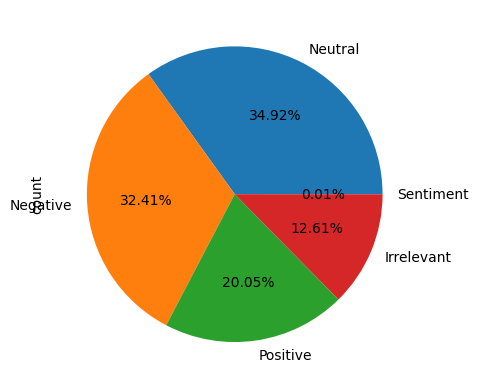

In [ ]:
train_data['label'].value_counts().plot.pie(autopct='%2.2f%%')

- I Will use only positive and negative text

In [ ]:
train_data = train_data[train_data['label'].isin(['Positive', 'Negative'])]

In [ ]:
train_data['label'].value_counts()

,count
label,
Negative,5748
Positive,3556


<Axes: ylabel='count'>

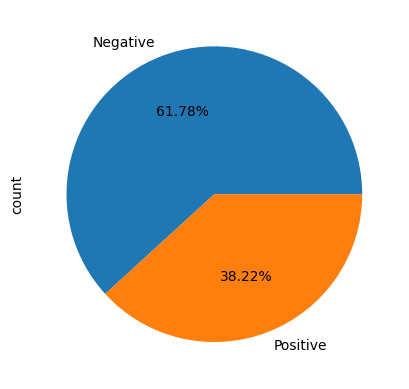

In [ ]:
train_data['label'].value_counts().plot.pie(autopct='%2.2f%%')

## Preprocessing

In [ ]:
embedding_dim =128
oov_tok ='<OOV>'
training_portion = .8
max_length =150

In [ ]:
train_data['text'][10]

'I’m extremely disappointed with amazon today! I ordered a kindle from lightning deal, and then the order was canceled leading to payment issue! When i try to order back again, it says the deal is already claimed, which is so disappointing! Thanks @amazonIN'

- **Data Cleaning**

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
punc =string.punctuation
st_words =stopwords.words('english')
print(st_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [ ]:
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer




def clean_text (text):

    text = re.sub('@ ?[\w]+', '', text)
    text = re.sub('https?://\S+|www\.\S+' ,' ',text)
    text = re.sub('\w*gmail.com\b|\w*yahoo.co.in\b' ,' ',text)
    text = re.sub('<.*>', '', text)
    text = re.sub('[\W]',' ', text)
    text = re.sub('[0-9]',' ', text)
    #remove single character
    text = re.sub('\s+[a-zA-Z]\s+',' ', text)
    #removeing multiple spaces
    text = re.sub('\s+',' ', text)

    #tokens = word_tokenize(text)

    text=''.join([word.lower() for word in text if word not in punc])
    text =' '.join([word for word in text.split() if word not in st_words])


    return text



train_data['cleaned_text'] = train_data['text'].apply(lambda x: clean_text(x))

train_data.head(15)

,label,text,cleaned_text
1,Negative,@amazon wtf .,wtf
2,Negative,@ amazon wtf.,wtf
4,Negative,@amazon wtf?,wtf
5,Negative,7 @amazon wtf.,wtf
6,Negative,<unk> wtf.,wtf
7,Negative,I’m really disappointed with amazon today! I o...,really disappointed amazon today ordered kindl...
8,Negative,I am really disappointed with Amazon today! I ...,really disappointed amazon today ordered light...
9,Negative,I'm really disappointed with amazon today! I o...,really disappointed amazon today ordered kindl...
10,Negative,I’m extremely disappointed with amazon today! ...,extremely disappointed amazon today ordered ki...
11,Negative,I mean ’ wa m really disappointed with amazon ...,mean wa really disappointed amazon sale today ...


In [ ]:
from collections import Counter
word_count = Counter()

for text in train_data['cleaned_text']:
    for word in text.split():
        word_count[word] += 1

word_count.most_common(10)

[('com', 1101),
 ('johnson', 1099),
 ('home', 970),
 ('microsoft', 901),
 ('depot', 829),
 ('facebook', 784),
 ('verizon', 754),
 ('google', 703),
 ('twitter', 692),
 ('nvidia', 681)]

In [ ]:
freq =set(word for (word ,wc) in word_count.most_common(5))
rare = set (word for (word ,wc) in word_count.most_common()[:-10:-1])
rare

{'accumulate',
 'boast',
 'gradually',
 'hype',
 'mounted',
 'played',
 'powered',
 'typed',
 'withhold'}

In [ ]:
train_data['label'].replace({'Positive':1, 'Negative':0}, inplace= True)

<ipython-input-25-c48686831f79>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['label'].replace({'Positive':1, 'Negative':0}, inplace= True)
<ipython-input-25-c48686831f79>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['label'].replace({'Positive':1, 'Negative':0}, inplace

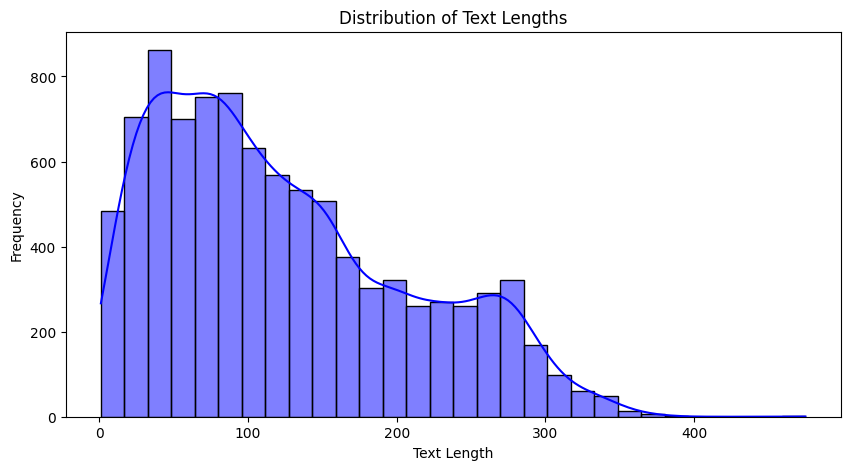

In [ ]:
text_lengths = [len(text) for text in train_data['text']]

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(text_lengths, bins=30, kde=True, color='blue')

# Labels and title
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("Distribution of Text Lengths")
plt.show()


In [ ]:
X = train_data['cleaned_text']
y = train_data['label']

In [ ]:
tokenizer =Tokenizer( oov_token= oov_tok )
tokenizer.fit_on_texts(X)
word_indx =tokenizer.word_index

sequence = tokenizer.texts_to_sequences(X)
sequence_padded =pad_sequences(sequence, padding= 'post', maxlen= max_length)

In [ ]:
vocab_size =len(word_indx)
vocab_size

8385

In [ ]:
# print(word_indx)

In [ ]:
word_indx['spent']

451

In [ ]:
print((X[10]))
print((sequence[10]))
print((sequence_padded[10]))

extremely disappointed amazon today ordered kindle lightning deal order canceled leading payment issue try order back says deal already claimed disappointing thanks
[19, 110, 12, 33, 321, 2627, 2628, 346, 1370, 105, 971, 304, 689, 330, 230, 1087, 151, 152, 236, 135, 2629, 2365]
[  19  110   12   33  321 2627 2628  346 1370  105  971  304  689  330
  230 1087  151  152  236  135 2629 2365    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0 

- save tokenizer

In [ ]:
joblib.dump(tokenizer, "tokenizer.pkl")

['tokenizer.pkl']

- Spilit text into train and validation

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(sequence_padded, y, test_size=0.2, random_state=42)

print('train_sentence length :',len(X_train))
print('train_labels length :',len(y_train))
print('test_sentence length :',len(X_val))
print('test_labels length :',len(y_val))

train_sentence length : 7443
train_labels length : 7443
test_sentence length : 1861
test_labels length : 1861


## Modle

In [ ]:
model =Sequential([
    Embedding(vocab_size +1, embedding_dim, input_length= max_length),

    Bidirectional(LSTM(64, return_sequences=True, dropout = 0.2 , recurrent_dropout = 0.2)),

    Bidirectional(LSTM(32, dropout = 0.2 , recurrent_dropout = 0.2)),


    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.build(input_shape=(None, max_length))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 150, 128)       │     1,073,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 150, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,215,553 (4.64 MB)

 Trainable params: 1,215,553 (4.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history =model.fit(X_train, y_train, batch_size=64, epochs= 10, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 120s 895ms/step - accuracy: 0.6445 - loss: 0.6037 - val_accuracy: 0.9199 - val_loss: 0.2253
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 133s 828ms/step - accuracy: 0.9514 - loss: 0.1383 - val_accuracy: 0.9441 - val_loss: 0.1454
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 103s 883ms/step - accuracy: 0.9793 - loss: 0.0559 - val_accuracy: 0.9420 - val_loss: 0.1552
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 135s 825ms/step - accuracy: 0.9813 - loss: 0.0430 - val_accuracy: 0.9511 - val_loss: 0.1484
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 97s 827ms/step - accuracy: 0.9845 - loss: 0.0339 - val_accuracy: 0.9479 - val_loss: 0.1849


In [ ]:
model.save('sentiment_analysis_model.keras')

In [ ]:
accur, loss =model.evaluate(X_val, y_val)

print('test accuracy is :',accur)
print('test loss is :',loss)

59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.9383 - loss: 0.1637
test accuracy is : 0.14544269442558289
test loss is : 0.9441160559654236


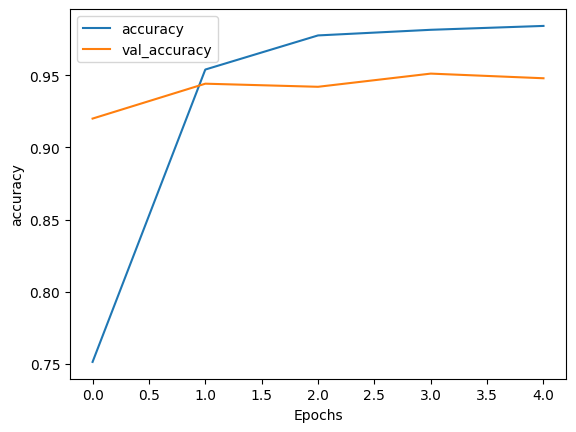

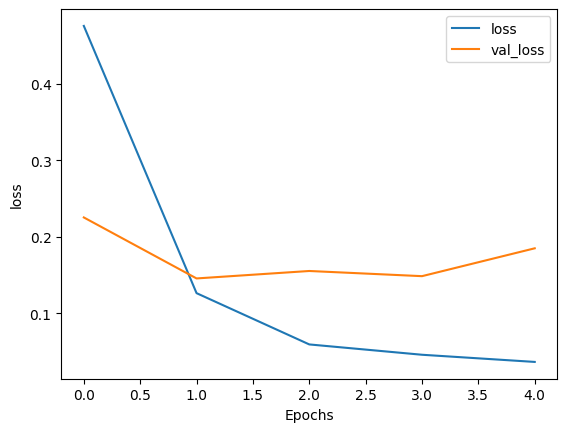

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+ string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string,'val_'+ string ])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

- **Confusion Matrix**

59/59 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step


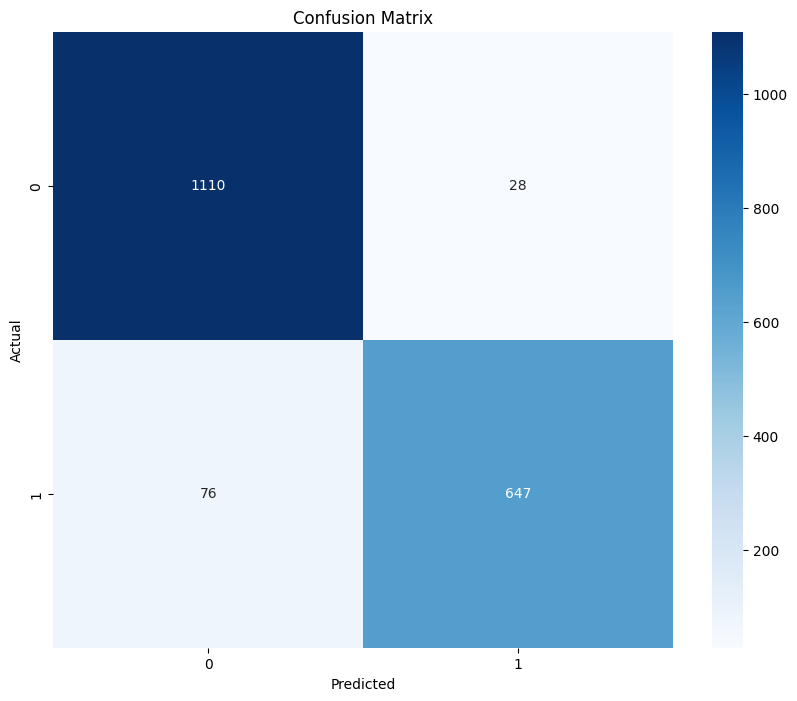

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred = model.predict(X_val)
y_pred_classes = (y_pred > 0.5).astype(int)


conf_matrix = confusion_matrix(y_val, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- **Classification Report**

In [ ]:
y_pred.max()

np.float32(0.99779606)

In [ ]:
y_pred_classes = np.array(y_pred_classes)

# Convert class labels to strings
target_names = [str(label) for label in np.unique(y)]

# Generate classification report
class_report = classification_report(y_val, y_pred_classes, target_names=target_names)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      1138
           1       0.96      0.89      0.93       723

    accuracy                           0.94      1861
   macro avg       0.95      0.94      0.94      1861
weighted avg       0.94      0.94      0.94      1861



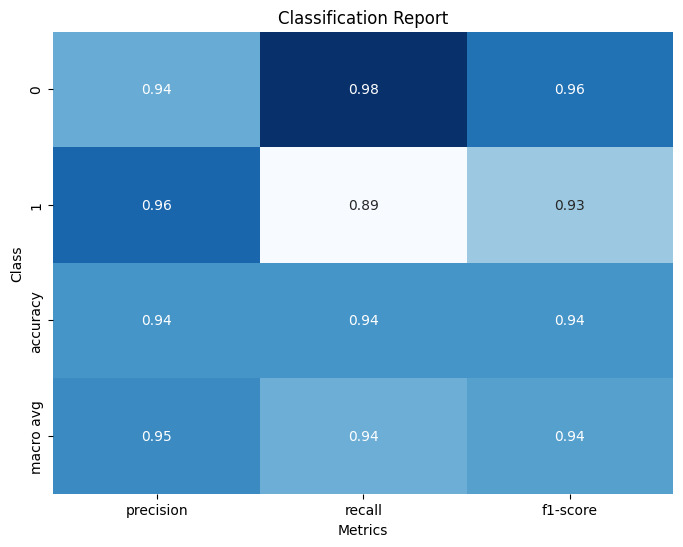

In [ ]:
report = classification_report(y_val, y_pred_classes, target_names=np.unique(y), output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f', cbar=False)
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.title('Classification Report' )
plt.show()